In [1]:
import sys
sys.path.append("gpib_instrument_control")

import lecroy_9354tm
import yig_controller_test

yigControllerPort='/dev/ttyUSB0'

s = lecroy_9354tm.Lecroy9354Tm()
yc = yig_controller_test.YigController(yigControllerPort)

Waiting for init... Done


In [20]:
import numpy as np
import time
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

def channelSweep(yigChannel=3):
    s.setVdiv('C1', 5)
    s.setCoupling('C1', "D1M")
    s.setTdiv(10e-6)
    s.setTrigSource('C1')
    s.setTrigMode('AUTO')
    s.setTrigCoupling('C1', 'AC')
    s.setTrigSlope('C1', 'POS')
    s.setTrigLevel('C1',0)
    s.setTrigDelayPct(50)
    s.opc()

    pk=[]
    avg=[]
    words= np.linspace(32767, -32768, 16)
    for v in words:
        v=int(v)
        #print("measuring control word", v)
        yc.yigA.set(yigChannel, v)
        time.sleep(0.5)
        w=s.getWaveform('C1')
        vpk=np.max(w.y)-np.min(w.y)
        vavg=np.mean(w.y)
        pk.append(vpk)
        avg.append(vavg)
        w.name=str(v)
        w.draw()
    
    w.show()
    plt.figure()
    plt.plot(words, pk, label='pk')
    plt.plot(words, avg, label='avg')
    plt.legend()
    return pk, avg

def channelStabilitySweep2(yigChannel=3):
    #setup trigger
    s.setTrigSource('C2')
    s.setTrigMode('AUTO')
    s.setTrigCoupling('C2', 'AC')
    s.setTrigSlope('C2', 'POS')
    s.setTrigLevel('C2',0)
    s.setTrigDelayPct(50)
    
    #set time
    s.setTdiv(20e-6)
    
    #setup channel 1
    s.setVdiv('C1', 2)
    s.setCoupling('C1', "D1M")
    s.setOffset('C1', -4)
    
    #setup channel 2
    s.setVdiv('C2', 2)
    s.setCoupling('C2', "D1M")
    s.setOffset('C2', -4)
    
    #setup channel 3
    s.setVdiv('C3', 0.5)
    s.setCoupling('C3', "D1M")
    s.setOffset('C3', 0)
    
    #setup channel 4
    s.setVdiv('C4', 0.5)
    s.setCoupling('C4', "D1M")
    s.setOffset('C3', 0)

    
    s.opc()

    pk=[]
    avg=[]
    words= np.linspace(32767, -32768, 8)
    words=[-23000]
    for v in words:
        v=int(v)
        #print("measuring control word", v)
        yc.yigA.set(yigChannel, v)
        time.sleep(0.5)
        w=s.getWaveform('C1')
        w2=s.getWaveform('C2')
        w3=s.getWaveform('C3')
        w4=s.getWaveform('C4')
        
        vpk=np.max(w.y)-np.min(w.y)
        vavg=np.mean(w.y)
        pk.append(vpk)
        avg.append(vavg)
        w.name += " VG " + str(v)
        w2.name += " FBO " + str(v)
        w3.name += " VREF " + str(v)
        w4.name += " VFB " + str(v)
        w.draw()
        w2.draw()
        w3.draw()
        w4.draw()
        
    plt.grid()
    plt.legend()
    plt.show()
    
    #plt.figure()
    #plt.plot(w2.y, w.y, label='VG vs VD')
    #plt.xlabel('Gate voltage [v]')
    #plt.ylabel('Drain voltage [V]')
    #plt.legend()
    #plt.grid()
    #plt.show()
    
    #plt.figure()
    #plt.plot(words, pk, label='pk')
    #plt.plot(words, avg, label='avg')
    #plt.legend()
    return pk, avg, w, w2

#pk, avg = channelSweep(3)

## Sweep of all channels as in schematic with 22ohm cement resistor as load

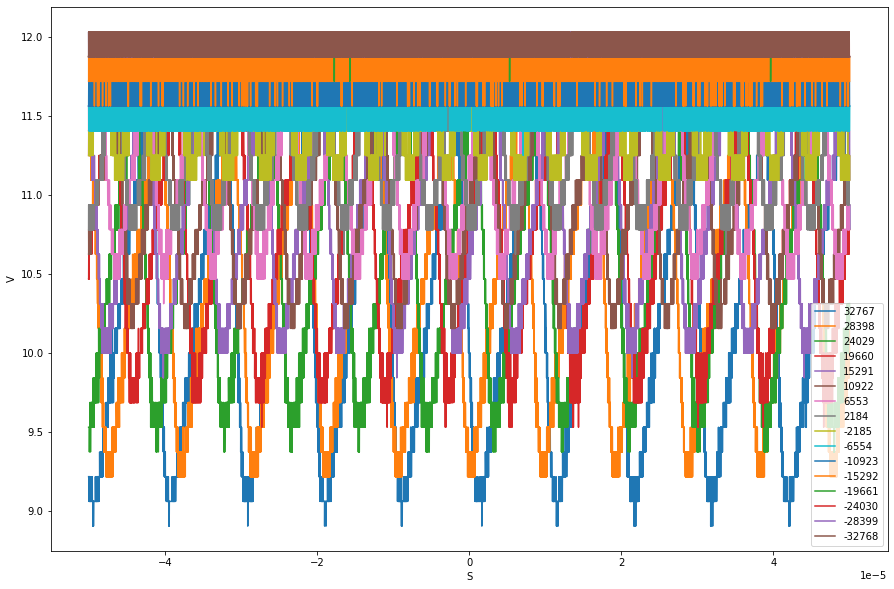

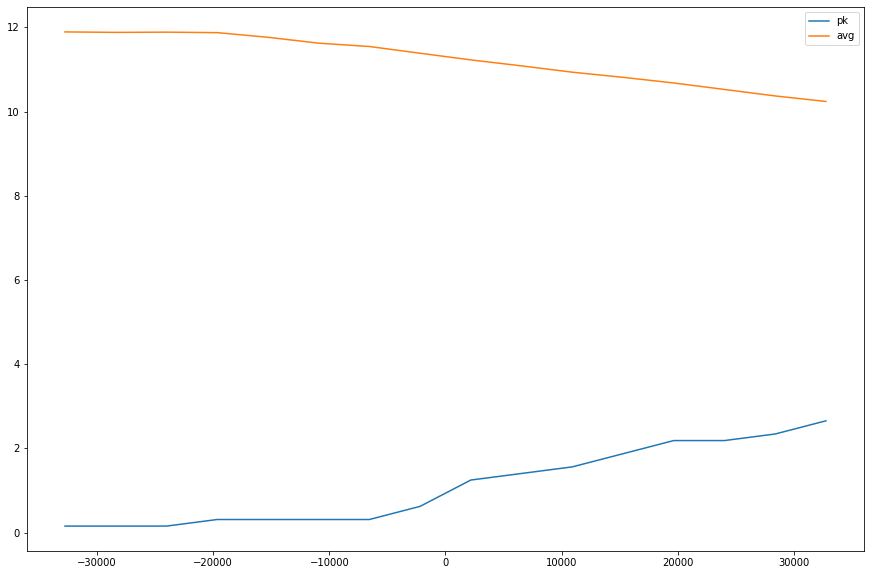

In [10]:
pk, avg = channelSweep(0)

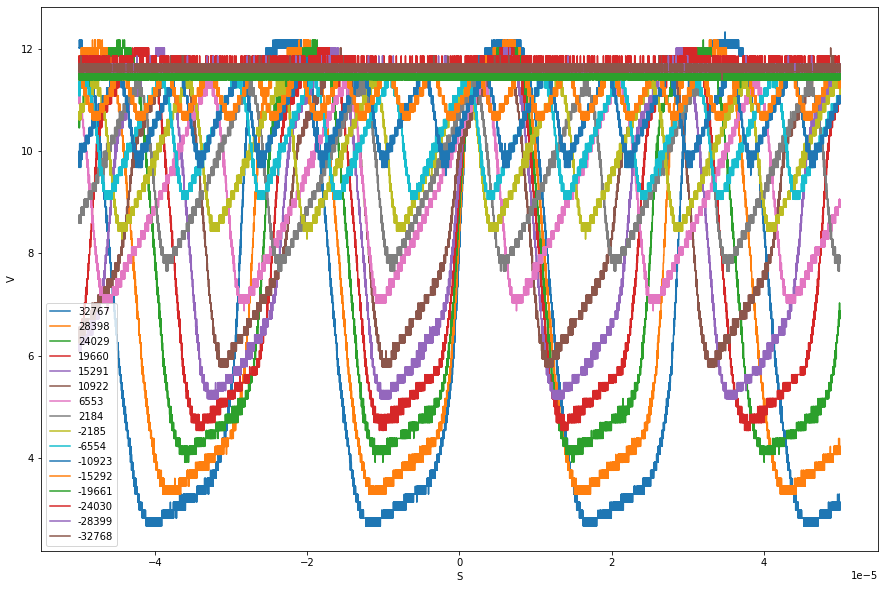

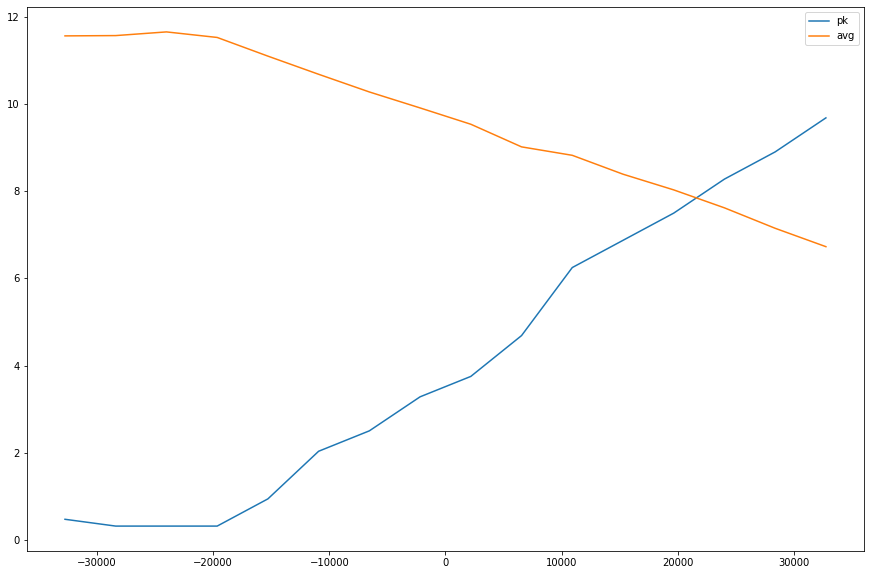

In [11]:
pk, avg = channelSweep(1)

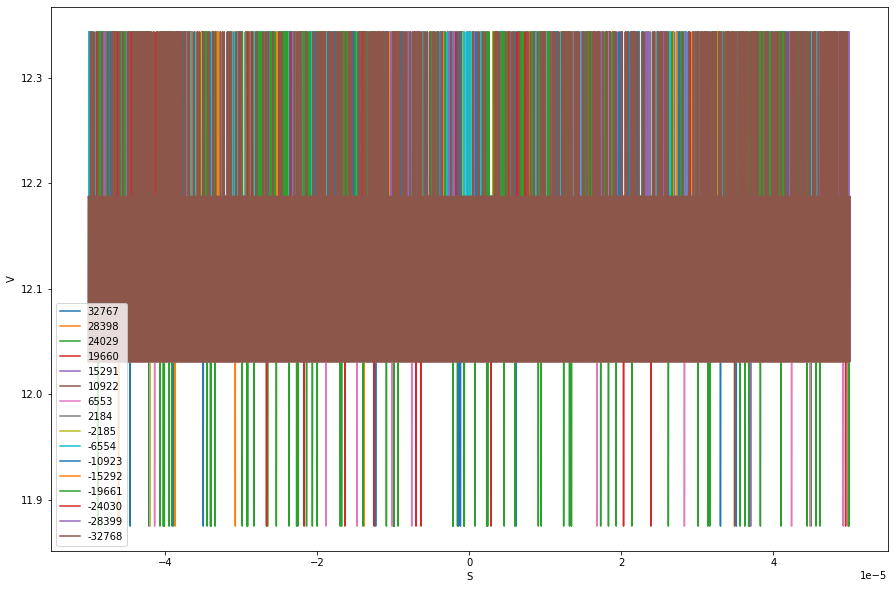

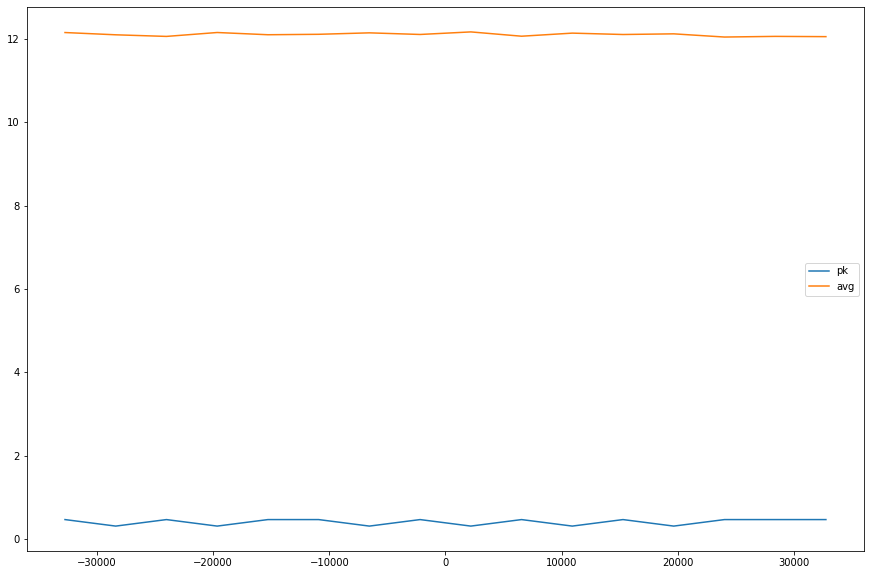

In [12]:
pk, avg = channelSweep(2)

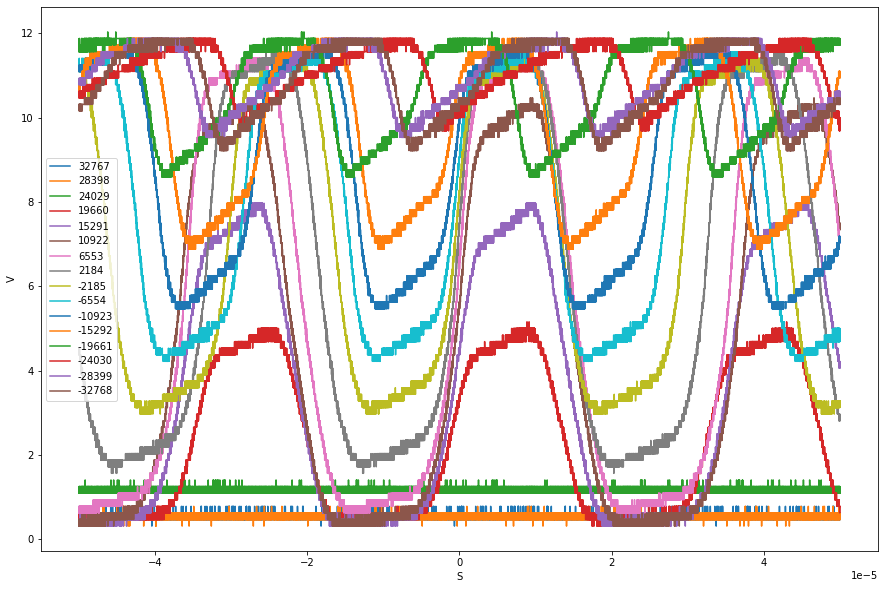

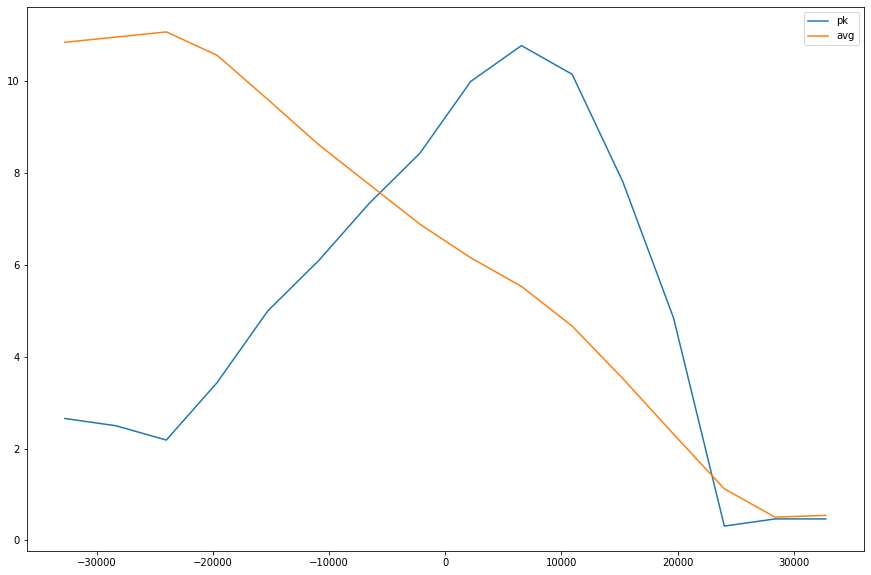

In [13]:
pk, avg = channelSweep(3)

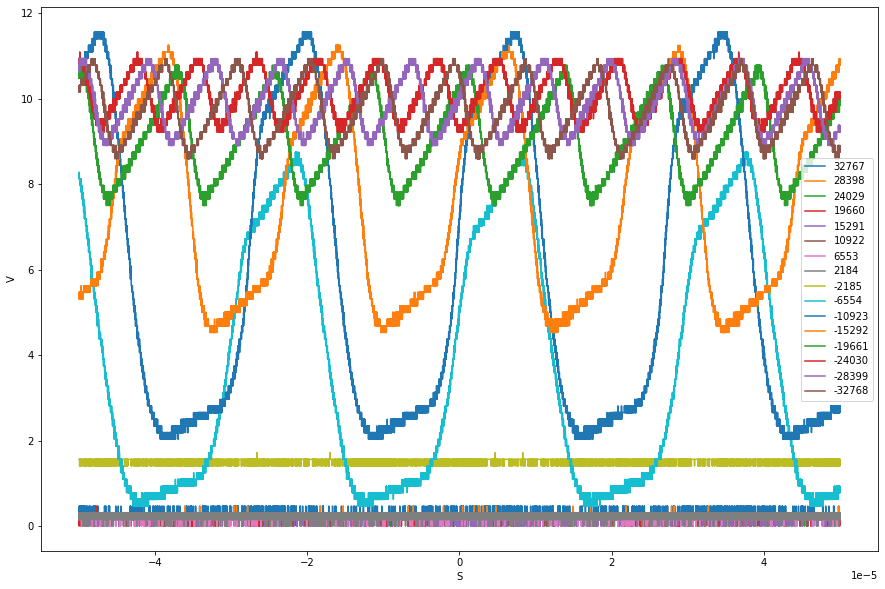

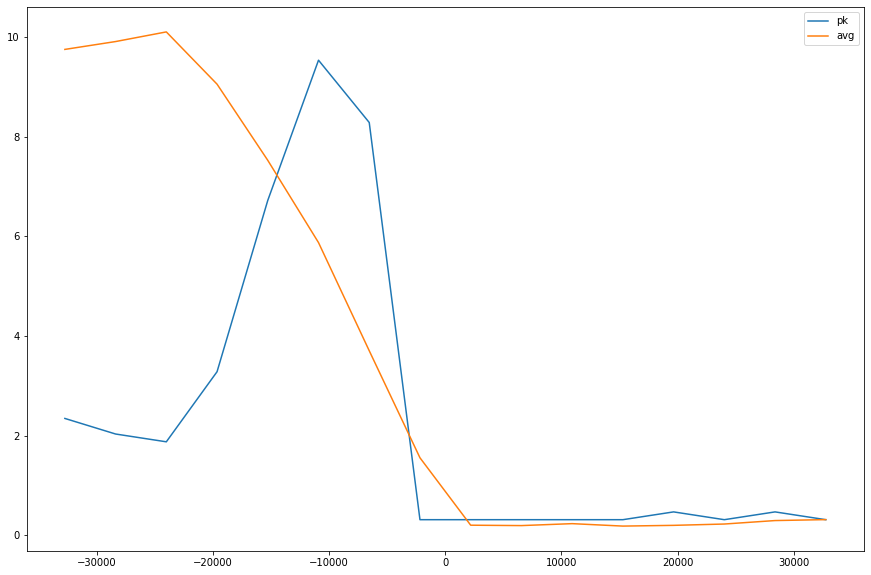

In [14]:
pk, avg = channelSweep(4)

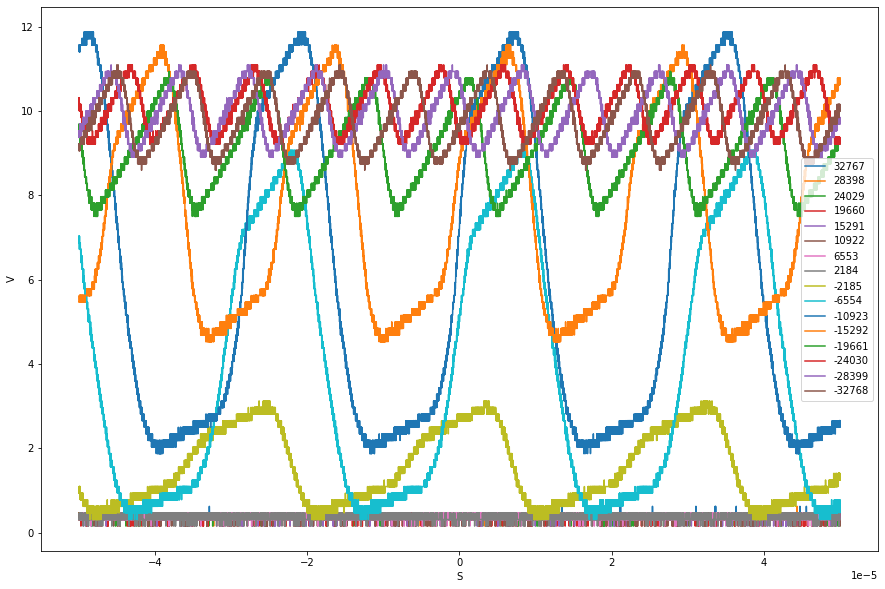

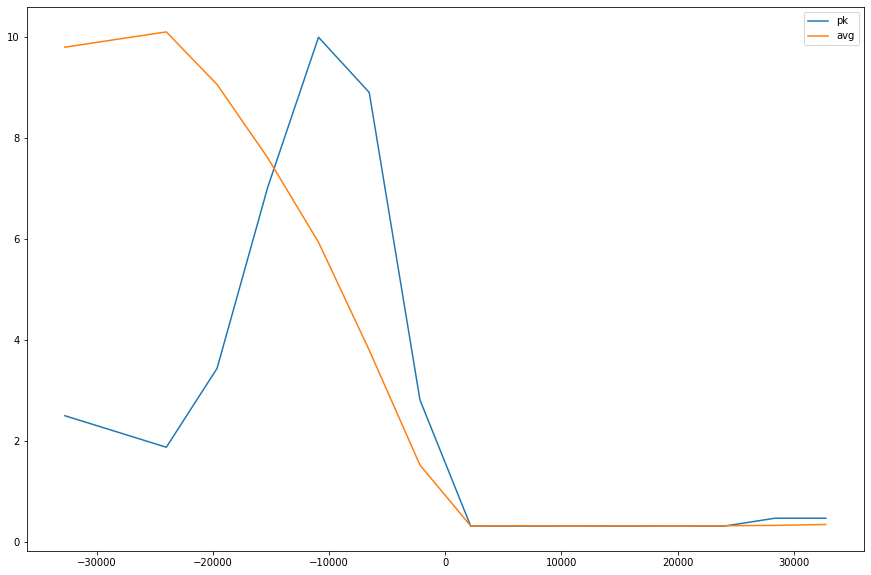

In [15]:
pk, avg = channelSweep(5)

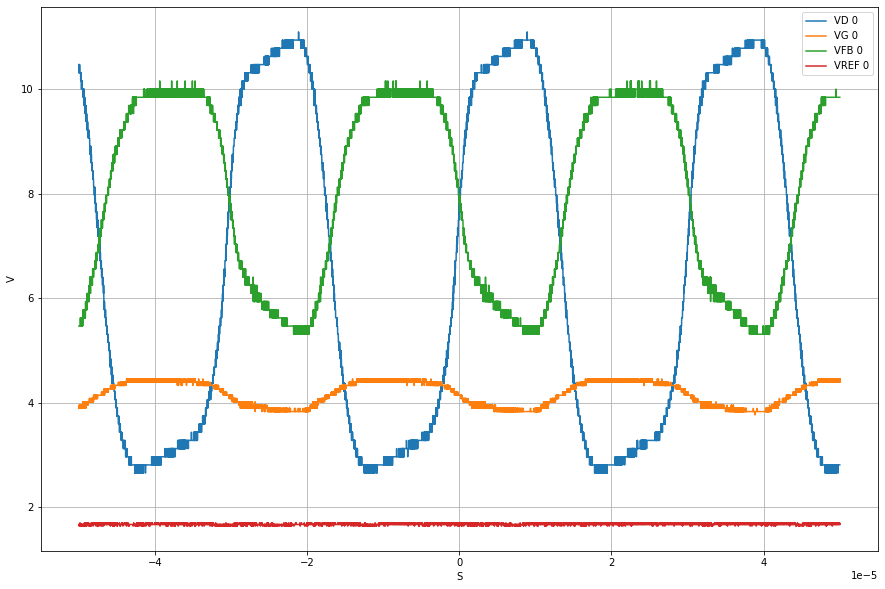

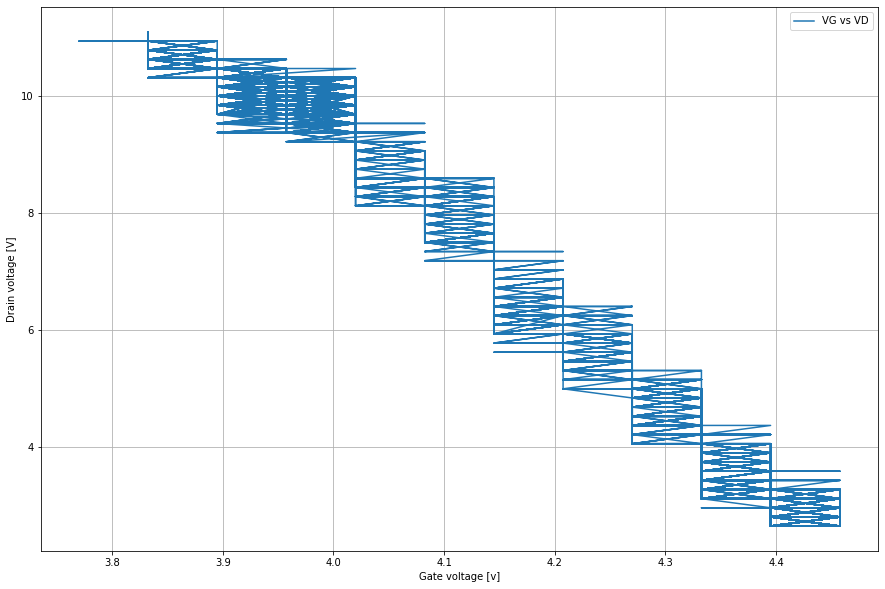

In [12]:
def channelStabilitySweep(yigChannel=3):
    #setup trigger
    s.setTrigSource('C1')
    s.setTrigMode('AUTO')
    s.setTrigCoupling('C1', 'AC')
    s.setTrigSlope('C1', 'POS')
    s.setTrigLevel('C1',0)
    s.setTrigDelayPct(50)
    
    #set time
    s.setTdiv(10e-6)
    
    #setup channel 1
    s.setVdiv('C1', 5)
    s.setCoupling('C1', "D1M")
    
    #setup channel 2
    s.setVdiv('C2', 2)
    s.setCoupling('C2', "D1M")
    
    #setup channel 3
    s.setVdiv('C3', 0.1)
    s.setCoupling('C3', "D1M")
    
    #setup channel 4
    s.setVdiv('C4', 1)
    s.setCoupling('C4', "D1M")

    
    s.opc()

    pk=[]
    avg=[]
    words= [0] #np.linspace(32767, -32768, 4)
    for v in words:
        v=int(v)
        #print("measuring control word", v)
        yc.yigA.set(yigChannel, v)
        time.sleep(0.5)
        w=s.getWaveform('C1')
        w2=s.getWaveform('C2')
        w3=s.getWaveform('C3')
        w4=s.getWaveform('C4')
        
        vpk=np.max(w.y)-np.min(w.y)
        vavg=np.mean(w.y)
        pk.append(vpk)
        avg.append(vavg)
        w.name = "VD " + str(v)
        w2.name = "VG " + str(v)
        w3.name = "VFB " + str(v)
        w4.name = "VREF " + str(v)
        w3.y*=50
        #w4.y*=50
        w.draw()
        w2.draw()
        w3.draw()
        w4.draw()
    plt.grid()
    plt.legend()
    plt.show()
    
    plt.figure()
    plt.plot(w2.y, w.y, label='VG vs VD')
    plt.xlabel('Gate voltage [v]')
    plt.ylabel('Drain voltage [V]')
    plt.legend()
    plt.grid()
    plt.show()
    #plt.figure()
    #plt.plot(words, pk, label='pk')
    #plt.plot(words, avg, label='avg')
    #plt.legend()
    return pk, avg, w, w2

foo = channelStabilitySweep(3)
yc.yigA.set(6, -32768)

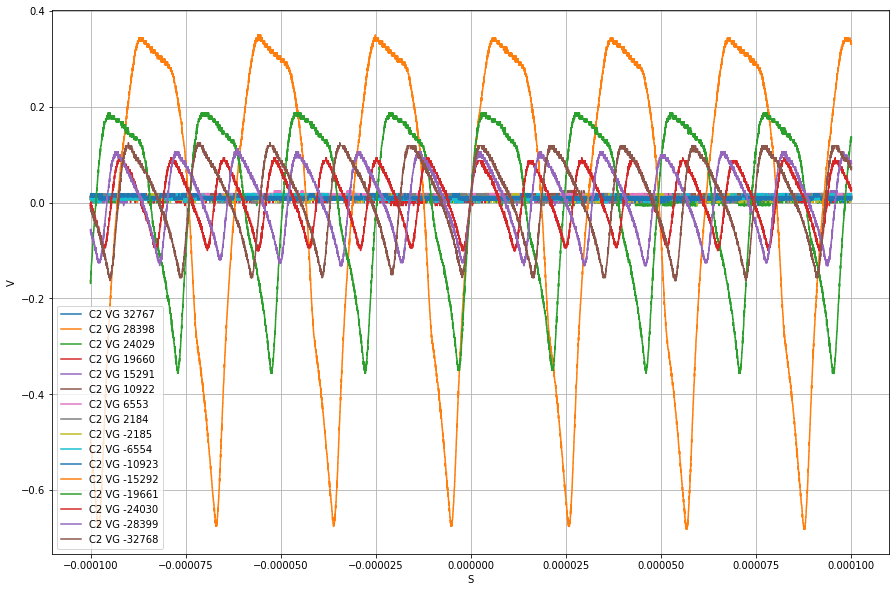

In [7]:


foo = channelStabilitySweep2(3)
yc.yigA.set(6, -32768)

## wit capacitor across rg

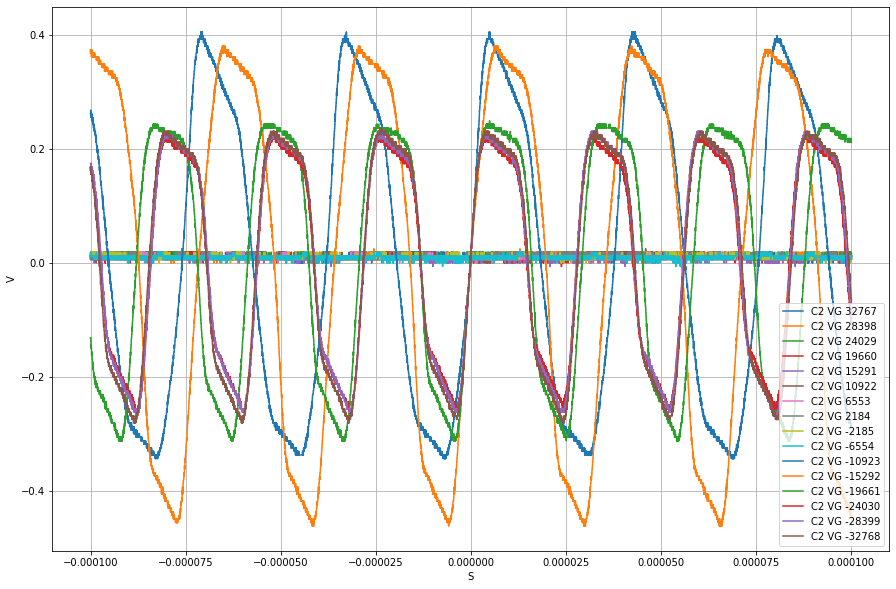

In [9]:
foo = channelStabilitySweep2(3)
yc.yigA.set(6, -32768)

## wit 2.2uf across rg

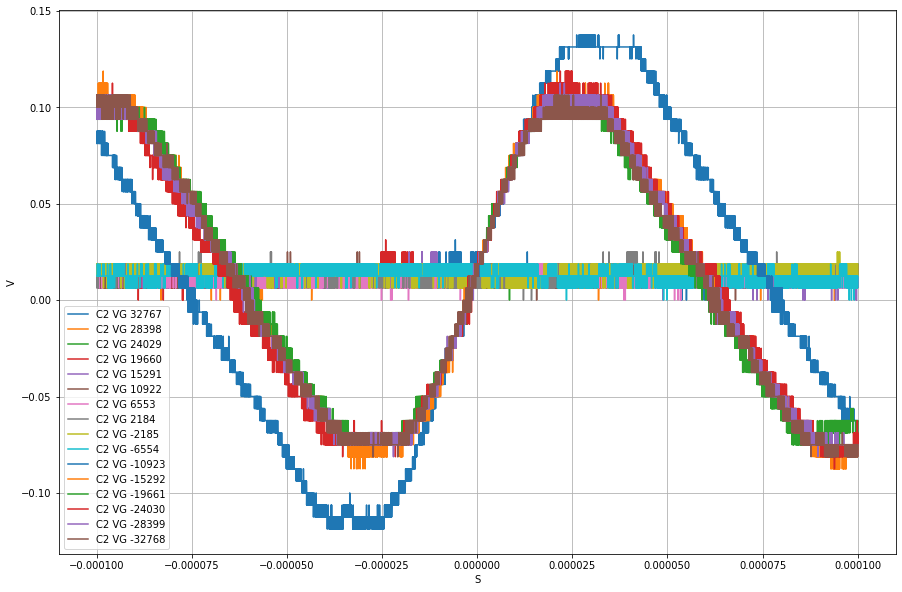

In [3]:
foo = channelStabilitySweep2(3)
yc.yigA.set(6, -32768)

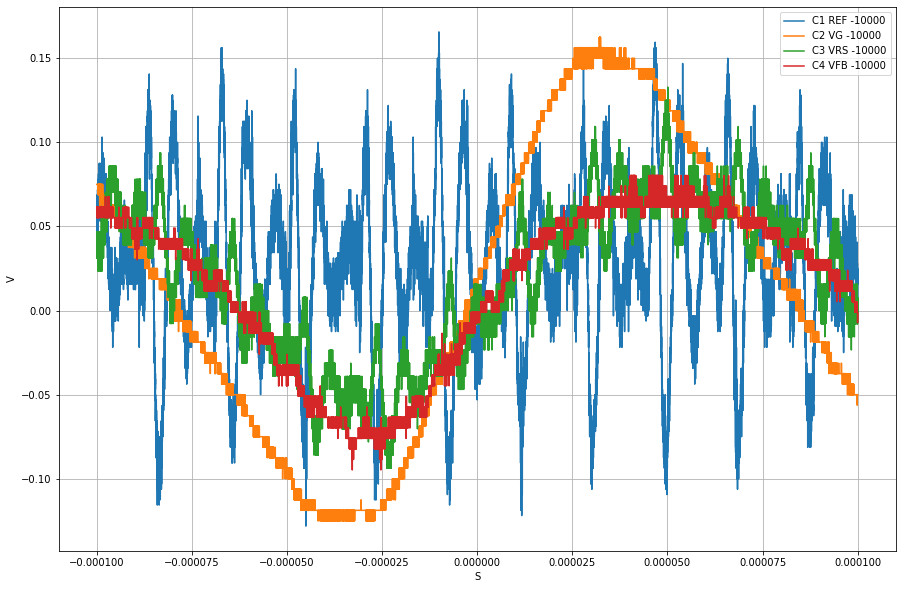

In [6]:
foo = channelStabilitySweep2(3)
yc.yigA.set(6, -32768)

## With series resitance between opamp and gate

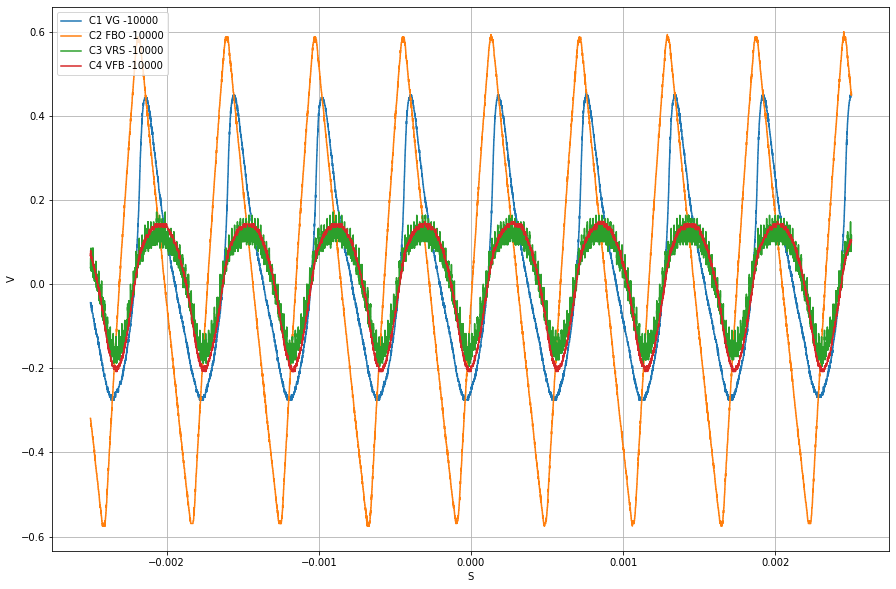

In [12]:
foo = channelStabilitySweep2(3)
yc.yigA.set(6, -32768)

## With resistance between opamp and gate, capacitor across pull down removed

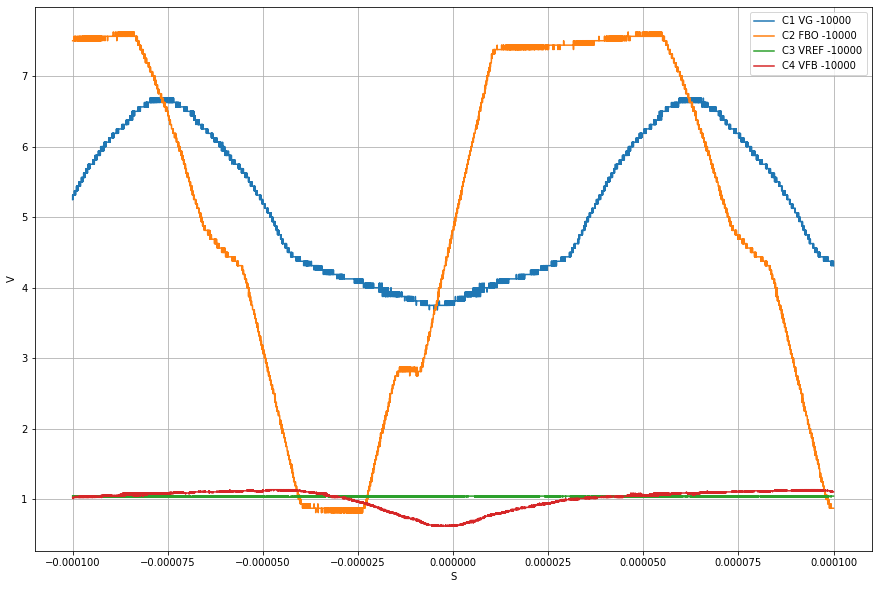

In [8]:
foo = channelStabilitySweep2(3)
yc.yigA.set(6, -10000)

## With resistance between opamp and gate, capacitor across pull down removed, sense resistor cap removed

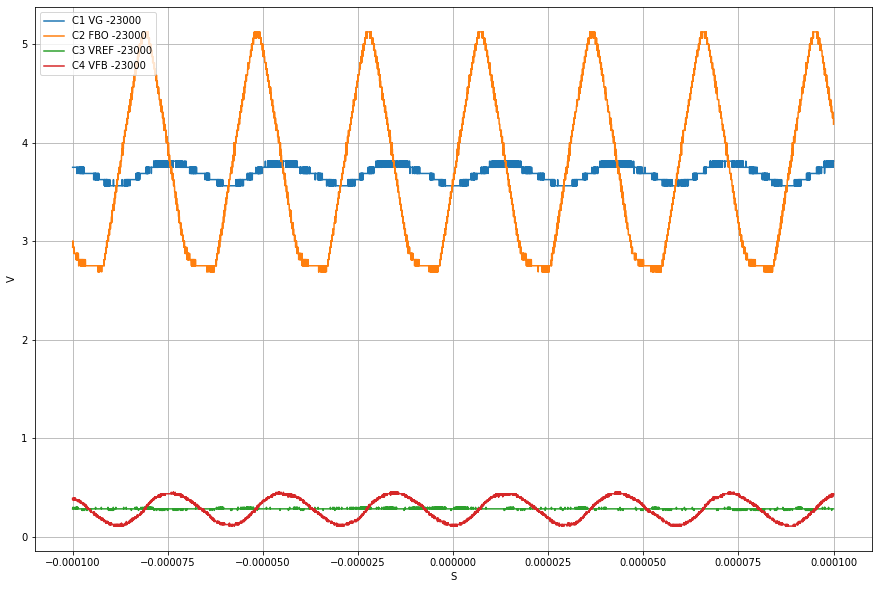

In [21]:
foo = channelStabilitySweep2(3)
yc.yigA.set(6, -10000)

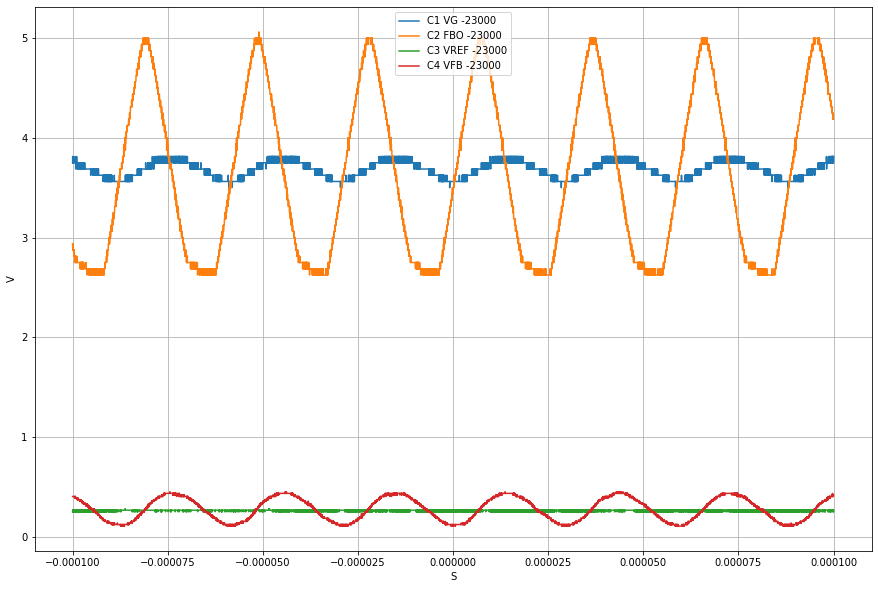

In [25]:
foo = channelStabilitySweep2(3)
yc.yigA.set(6, -10000)